In [2]:
import sys
import pandas as pd
sys.path.append("../airflow/plugins")
from db_connection import DbConnection
from domain_model import Instrument, Interval
from portfolio import Portfolio

In [3]:
db_connection = DbConnection.local_db_connection()
instrument = Instrument.get_instrument("SBER")
interval = Interval.min_10
portfolio = Portfolio(db_connection, instrument, interval)

In [4]:
yield_df = portfolio.get_yield(initial_balance=100000)
yield_df

,yield,yield_with_commission
time_utc,,
2024-12-25 07:00:00+00:00,0.000,-0.013118
2024-12-25 07:10:00+00:00,-0.073,-0.112428
2024-12-25 07:30:00+00:00,0.013,-0.052825
2024-12-25 08:10:00+00:00,0.054,-0.038180
2024-12-25 08:20:00+00:00,0.149,0.030370
...,...,...
2024-12-28 14:40:00+00:00,0.358,-2.035442
2024-12-28 15:10:00+00:00,0.330,-2.090613
2024-12-28 15:20:00+00:00,0.327,-2.120781


In [5]:
avg_yield = yield_df['yield'].mean()
daily_yield = avg_yield / 4
annual_yield =  daily_yield * 248
print(f'Annual yield:{annual_yield}')

Annual yield:9.776666666667374


<Axes: xlabel='time_utc'>

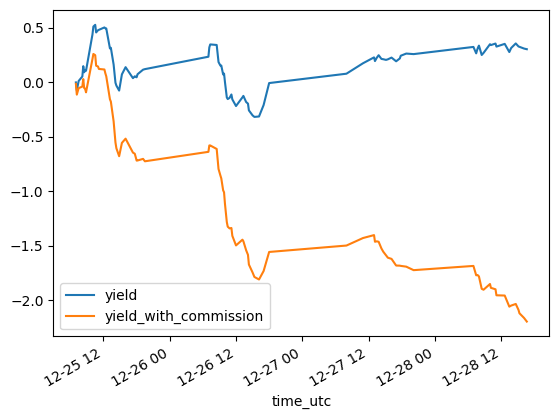

In [6]:
#yield_df['yield'].plot()
yield_df.plot()

In [13]:
operations_df = portfolio._get_operations(grouped=True)
operations_df

,price,quantity,commission
time_utc,,,
2024-12-25 07:00:00+00:00,262.37,-100,-13.1185
2024-12-25 07:10:00+00:00,263.10,200,-26.3100
2024-12-25 07:30:00+00:00,263.96,-200,-26.3960
2024-12-25 08:10:00+00:00,263.55,200,-26.3550
2024-12-25 08:20:00+00:00,264.50,-200,-26.4500
...,...,...,...
2024-12-28 14:40:00+00:00,271.43,-200,-27.1430
2024-12-28 15:10:00+00:00,271.71,200,-27.1710
2024-12-28 15:20:00+00:00,271.68,-200,-27.1680
